# Housing Analysis
**Author**: Eric Wehmueller

***

## Overview

This project is the second project for Flatiron School's bootcamp program in Data Science.  We are being placed into a hypothetical situation as a Data Scientist and hoping to provide value to our business for the scenario we are given.


## Business Problem

I have been hired by a real estate agency that helps homeowners sell homes.  For this project, I am to provide expected/estimated home prices to homeowners based on the logistics of their home.  This can also give insight on how home renovations might increase the estimated value of their homes, and what type of potential renovations are best.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Investigation and Cleaning

To start, we have access to the King County House Sales dataset.  Let's take a look at this to get a feel for what our starting point is and what raw data we have to work with.

In [50]:
df_original = pd.read_csv("data\kc_house_data.csv")

In [51]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [52]:
df_original.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570



Per the project description, I will be ignoring the following features: date, view, sqft_above, sqft_basement, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15. For the time being, I am trying to make my modeling phase in this project as simple as possible.

In [53]:
df_col_drops = df_original.drop(columns=['id', 'date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'])
display(df_col_drops)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009,47.6993,-122.346
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014,47.5107,-122.362
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009,47.5944,-122.299
21595,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004,47.5345,-122.069


In [54]:
df_col_drops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  lat          21597 non-null  float64
 11  long         21597 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 2.0 MB


Waterfront appears to have ~2000 null values. Let's investigate what values are in this column to see what we can do about the null values.

Which ones are the most important features?

In [55]:
df_col_drops.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

Only 146 have a waterfront view. Since this is a binary-filled column, I believe we can fill in all NaNs with a zero value. This makes sense, as NaNs almost certainly denotes the absence of a waterfront view.

In [56]:
df_col_drops.waterfront.fillna(0, inplace=True)
display(df_col_drops.head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,47.6168,-122.045


In [57]:
df_col_drops.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,3.409825,7.657915,1970.999676,47.560093,-122.213982
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.650546,1.173200,29.375234,0.138552,0.140724
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,47.155900,-122.519000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,47.471100,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,47.571800,-122.231000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,47.777600,-121.315000


In [58]:
df_col_drops.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built', 'lat', 'long'],
      dtype='object')

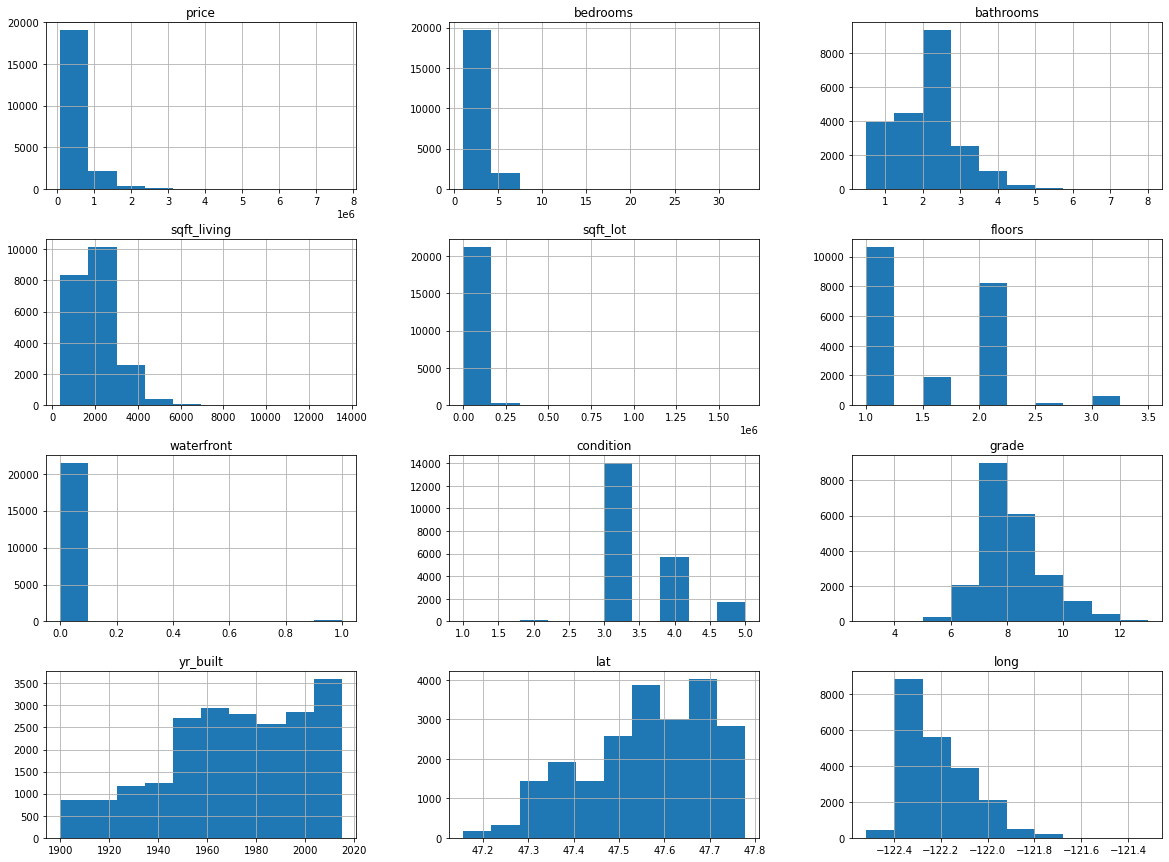

In [59]:
#iterating over all columns except id to see general distributions

df_col_drops.hist(figsize = (20,15));

It appears that we have some outliers in this data, so it's a little difficult to get a sense for what some the distrubutions actually are. 

Specifically, I'm seeing a single entry priced at 7.7 million. 

I also can't really tell what the bedroom distribution is with an outlier of 33. 

sqft_lot has only a single column in this view and the mean is vastly different from the median. We will need to take a closer look at this as well. 

Condition and grade seem to be relatively normal.

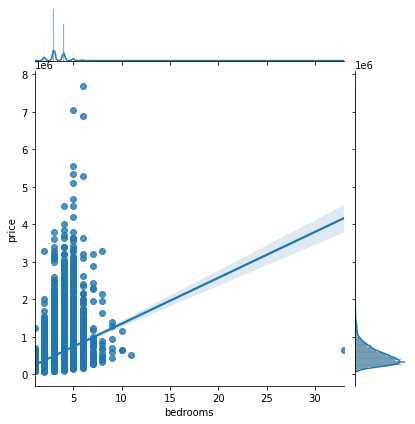

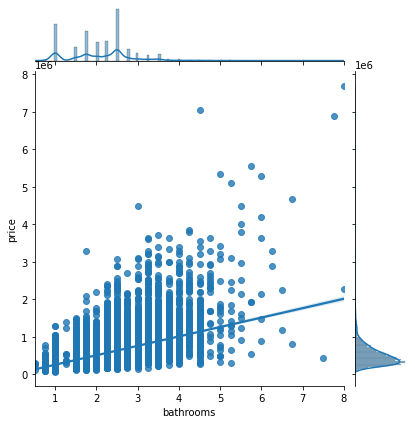

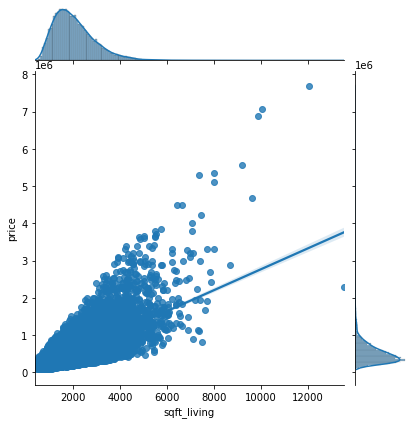

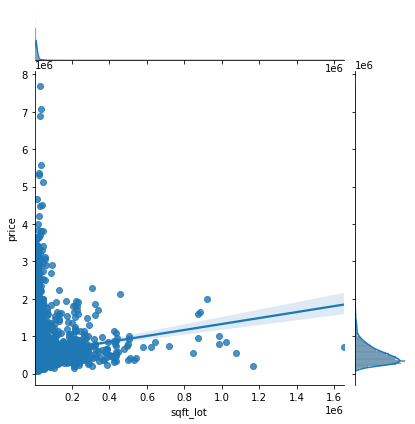

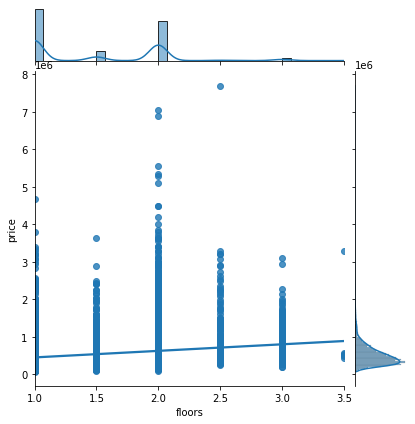

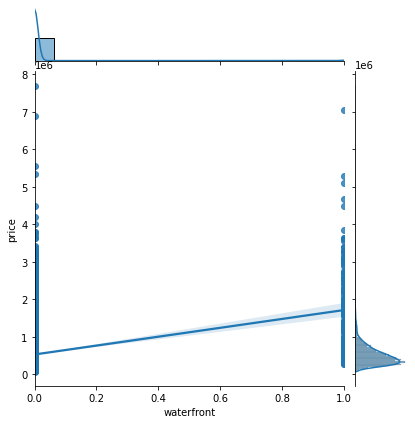

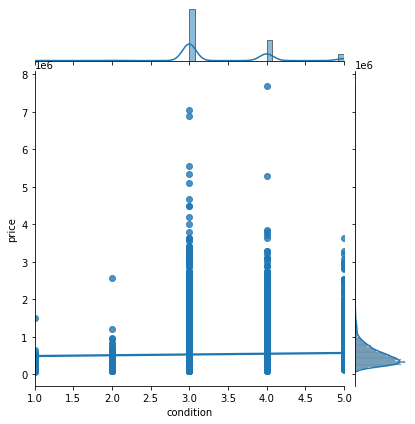

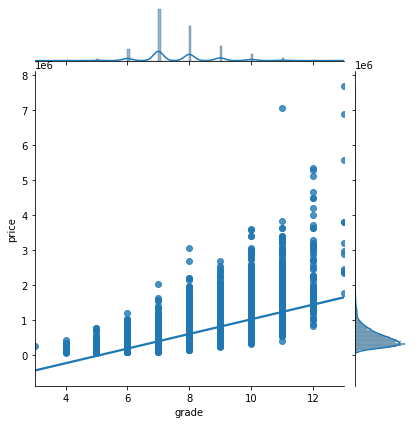

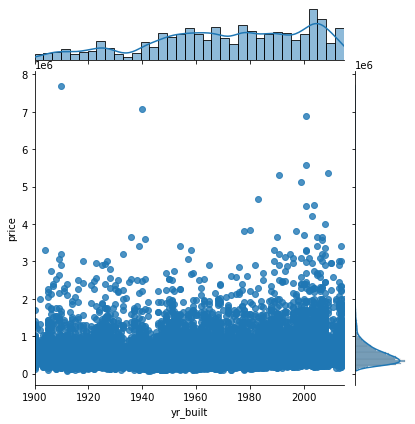

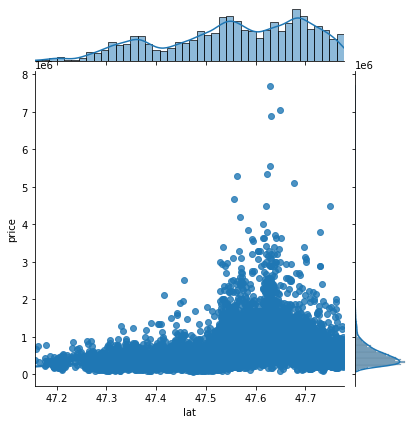

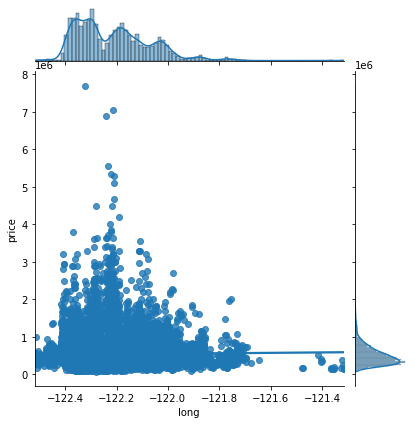

In [60]:
#Check for linearity via jointplots
for col_name in df_col_drops.columns[1:]:
    sns.jointplot(x=col_name, y='price', data=df_col_drops, kind='reg');

It worth noting that these jointplots reveal several of these columns to have linear relations with price.  

**Strong Linear Relation**: sqft_living, grade

**Somehwat Linear**: bathrooms, sqft_lot, waterfront

**Little to No Linear Relation**: bedrooms, floors, condition, yr_built, lat, long

It appears that the features that have the largest impact on the price of a home are the square footage of the home, as well as the Grade- this rating is given by the King County Housing System. I have copied this system below for more context.

***
1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

## Feature Engineering

Two fields jump out at me: latitude and longitude. As we already know, this data is taken from the King County Housing dataset, which includes the city of Seattle.  Let's engineer a feature that determines the distance from "downtown" using lat and long.



In [61]:
#using 47.605° N, 122.334° W as the exact point for downton (via Google)
dtwn_lat = 47.605
dtwn_long = -122.334
dtwn_coords = (dtwn_lat, dtwn_long)
print(type(dtwn_coords))

second_coords = (df_col_drops['lat'][0], df_col_drops['long'][0])
print(second_coords)

<class 'tuple'>
(47.5112, -122.257)


In [62]:
import haversine as hs

#solving for a single location, in kilometers
hs.haversine(dtwn_coords, second_coords)

11.923605090619347

In [63]:
#creating feature column
df_col_drops['dist_to_dtwn'] = df_col_drops.lat
for index, row in df_col_drops.iterrows():
    df_col_drops['dist_to_dtwn'][index] = hs.haversine(dtwn_coords, point2=(df_col_drops['lat'][index], df_col_drops['long'][index]) )

<ipython-input-63-edcbe8011a22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col_drops['dist_to_dtwn'][index] = hs.haversine(dtwn_coords, point2=(df_col_drops['lat'][index], df_col_drops['long'][index]) )


In [64]:
df_col_drops.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long,dist_to_dtwn
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,47.5112,-122.257,11.923605
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,47.7210,-122.319,12.947452
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,47.7379,-122.233,16.600484
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,47.5208,-122.393,10.356458
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,47.6168,-122.045,21.704132
5,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,2001,47.6561,-122.005,25.300013
6,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1995,47.3097,-122.327,32.840124
7,291850.0,3,1.50,1060,9711,1.0,0.0,3,7,1963,47.4095,-122.315,21.785433
8,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1960,47.5123,-122.337,10.310242
9,323000.0,3,2.50,1890,6560,2.0,0.0,3,7,2003,47.3684,-122.031,34.792535


In [65]:
#dropping these so we don't confuse our model- dist_to_dtwn is derived from lat and long
df_col_drops = df_col_drops.drop(['lat', 'long'], axis=1)

# Modeling 
***
## Model 1

In [66]:
outcome = 'price'
x_cols = list(df_col_drops.columns)
x_cols.remove(outcome)
print(x_cols)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'dist_to_dtwn']


In [67]:
price_log = np.log(df_col_drops.price)
price_log = pd.DataFrame(price_log)

X1= df_col_drops.drop('price', 1)
y1= price_log

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)

In [69]:
#normalization
for col in x_cols:
    X_train[col] = (X_train[col] - X_train[col].mean())/X_train[col].std()
display(X_train.head())
print(len(X_train), len(X_test))

<ipython-input-69-c934d189158c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = (X_train[col] - X_train[col].mean())/X_train[col].std()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,dist_to_dtwn
10296,0.674948,0.498341,0.619859,-0.112913,0.938822,-0.084675,0.914648,0.288847,0.608323,1.740393
6834,-1.478528,-1.452013,-0.760443,-0.226244,-0.919248,-0.084675,-0.626446,-0.562033,-1.809483,-0.785643
4411,0.674948,1.473518,1.571942,0.021428,0.938822,-0.084675,-0.626446,1.990606,0.880752,0.422575
17949,-0.401790,-0.476836,0.152513,0.060760,-0.919248,-0.084675,0.914648,0.288847,-0.140856,0.584896
14025,-1.478528,-1.452013,-1.108235,-0.242759,-0.919248,-0.084675,2.455743,-1.412912,-0.072749,1.349872


17277 4320


In [70]:
# predictors = '+'.join(x_cols)
# formula = outcome + '~' + predictors
# model = ols(formula=formula, data=train).fit()
# model.summary()

predictors = sm.add_constant(X_train)
model_1 = sm.OLS(y_train, predictors).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     4659.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:26:24   Log-Likelihood:                -2150.8
No. Observations:               17277   AIC:                             4324.
Df Residuals:                   17266   BIC:                             4409.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.0483      0.002   6256.365      0.000      13.044      13.052
bedrooms        -0.0157      0.003     -5.919      0.000      -0.021      -0.011
bathrooms        0.0373      0.004      9.961      0.000       0.030       0.045
sqft_living      0.1994      0.004     46.572      0.000       0.191       0.208
sqft_lot         0.0394      0.002     17.876      0.000       0.035       0.044
floors           0.0163      0.003      6.174      0.000       0.011       0.022
waterfront       0.0429      0.002     20.343      0.000       0.039       0.047
condition        0.0398      0.002     17.514      0.000       0.035       0.044
grade            0.2169      0.004     59.966      0.000       0.210       0.224
yr_built        -0.0571      0.003    -18.327      0.000      -0.063      -0.051
dist_to_dtwn    -0.1853      0.002    -74.978      0.000      -0.190      -0.180
==============================================================================
Omnibus:                      359.665   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              654.587
Skew:                          -0.158   Prob(JB):                    7.21e-143
Kurtosis:                       3.900   Cond. No.                         4.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-values are less than 0.05 for our selected columns. Let's take a look at our residuals for normality.

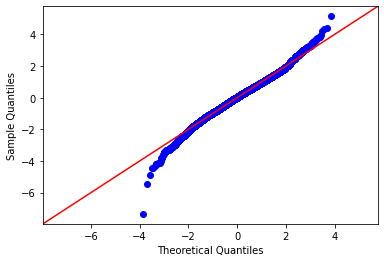

In [71]:
fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

This doesn't look great, as our QQ plot looks incorrect and we have a pronounced funnel shape on our check for homoscedasticity. We are going to need to make some changes.


In [72]:
regression = LinearRegression()
regression.fit(X_train, y_train)

#use the regression for the train and test data
y_hat_train = regression.predict(X_train)
y_hat_test = regression.predict(X_test)

#Root Mean Square Error
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print(f'Train Root Mean Square Error: {train_rmse}')
print(f'Test Root Mean Square Error: {test_rmse}')

Train Root Mean Square Error: 0.2740482481449564
Test Root Mean Square Error: 1965.0616949122686


## Models Addressing Multicollinearity

For this iteration, I'm going to remove some outliers. (log transformation?)

I recall having the most issues determining the normal distributions of sqft_lot and bedrooms, so I'm going to filter on both.

<AxesSubplot:>

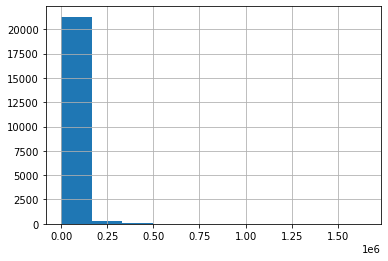

In [73]:
df_col_drops.sqft_lot.hist()

In [74]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q,df_col_drops.sqft_lot.quantile(q=q)))

0.8 percentile: 12182.399999999998
0.81 percentile: 12558.0
0.82 percentile: 13055.439999999995
0.83 percentile: 13503.68
0.84 percentile: 14197.0
0.85 percentile: 15000.0
0.86 percentile: 15716.040000000012
0.87 percentile: 16646.640000000003
0.88 percentile: 18000.0
0.89 percentile: 19550.0
0.9 percentile: 21371.600000000006
0.91 percentile: 24149.360000000015
0.92 percentile: 28505.119999999995
0.93 percentile: 34848.0
0.94 percentile: 37643.19999999999
0.95 percentile: 43307.200000000026
0.96 percentile: 50655.28
0.97 percentile: 67381.7199999999
0.98 percentile: 107157.0
0.99 percentile: 213008.0


I think filtering out homes with greater than 100k sqaure feet is acceptable here.

<AxesSubplot:>

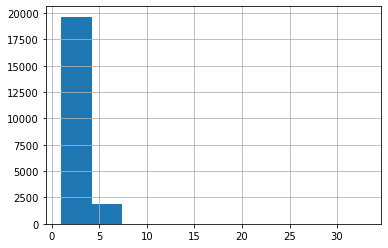

In [75]:
df_col_drops.bedrooms.hist()

In [76]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q,df_col_drops.bedrooms.quantile(q=q)))

0.8 percentile: 4.0
0.81 percentile: 4.0
0.82 percentile: 4.0
0.83 percentile: 4.0
0.84 percentile: 4.0
0.85 percentile: 4.0
0.86 percentile: 4.0
0.87 percentile: 4.0
0.88 percentile: 4.0
0.89 percentile: 4.0
0.9 percentile: 4.0
0.91 percentile: 4.0
0.92 percentile: 5.0
0.93 percentile: 5.0
0.94 percentile: 5.0
0.95 percentile: 5.0
0.96 percentile: 5.0
0.97 percentile: 5.0
0.98 percentile: 5.0
0.99 percentile: 6.0


In [77]:
df_col_drops.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

I will also be filtering out all houses with more than 6 bedrooms, removing about 2% of the total entries. (may overlap with sq footage)

I will also include a log transformation to the price feature, as this may help fix our QQplot from Model 1.

In [78]:
orig_tot = len(df_col_drops)
df_outlier_filter = df_col_drops.copy()
df_outlier_filters = df_outlier_filter[df_outlier_filter.sqft_lot < 100000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df_outlier_filters))/orig_tot)

df_outlier_filters = df_outlier_filters[df_outlier_filters.bedrooms < 7] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df_outlier_filters))/orig_tot)

#applying a log transformation to the price, which is right skewed
df_outlier_filter['price'] = np.log(df_outlier_filter['price'])

#train2, test2 = train_test_split(df_outlier_filters)


Percent removed: 0.021530768162244755
Percent removed: 0.024355234523313424


In [111]:
X2 = df_outlier_filter.drop('price', 1)
y2 = df_outlier_filter['price']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

# Refit model with subset features
predictors = sm.add_constant(X_train2)
model_2 = sm.OLS(y_train2, predictors).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     4612.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:39:16   Log-Likelihood:                -2112.3
No. Observations:               17277   AIC:                             4247.
Df Residuals:                   17266   BIC:                             4332.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.0357      0.209     66.998      0.000      13.625      14.446
bedrooms        -0.0653      0.009     -7.010      0.000      -0.084      -0.047
bathrooms        0.0635      0.005     13.007      0.000       0.054       0.073
sqft_living      0.0002   4.84e-06     40.661      0.000       0.000       0.000
sqft_lot         0.0652      0.003     21.160      0.000       0.059       0.071
floors           0.0588      0.005     11.434      0.000       0.049       0.069
waterfront       0.5158      0.026     19.830      0.000       0.465       0.567
condition        0.0594      0.003     17.038      0.000       0.053       0.066
grade            0.1771      0.003     57.343      0.000       0.171       0.183
yr_built        -0.0017      0.000    -15.867      0.000      -0.002      -0.001
dist_to_dtwn    -0.0189      0.000    -74.468      0.000      -0.019      -0.018
==============================================================================
Omnibus:                      256.808   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.424
Skew:                          -0.144   Prob(JB):                     2.05e-89
Kurtosis:                       3.696   Cond. No.                     2.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

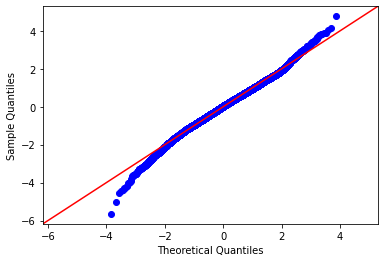

In [112]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

In [113]:
regression2 = LinearRegression()
regression2.fit(X_train2, y_train2)

#use the regression for the train and test data
y_hat_train2 = regression2.predict(X_train2)
y_hat_test2 = regression2.predict(X_test2)

#Root Mean Square Error
train_rmse2 = np.sqrt(mean_squared_error(y_train2, y_hat_train2))
test_rmse2 = np.sqrt(mean_squared_error(y_test2, y_hat_test2))

print(f'Train Root Mean Square Error: {train_rmse2}')
print(f'Test Root Mean Square Error: {test_rmse2}')

Train Root Mean Square Error: 0.27343820056668555
Test Root Mean Square Error: 0.27311265774878085


Similar problems as last time, but our OLS has alerted us that there is strong collinearity. Let's investigate what we should remove.

In [114]:
X = df_col_drops[x_cols]
X['constant'] = np.ones(X.shape[0])
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.6311136630472653),
 ('bathrooms', 3.215688966233134),
 ('sqft_living', 4.211173170919058),
 ('sqft_lot', 1.1150457494029746),
 ('floors', 1.6055072567823685),
 ('waterfront', 1.0219826889310346),
 ('condition', 1.1874067595264461),
 ('grade', 3.0015991231227797),
 ('yr_built', 2.240108337334204),
 ('dist_to_dtwn', 1.4004289073409446)]

You usually want to remove variables with a cif of 5~10 or greater, indicating that they are displaying multicollinearity with other variables in the feature set. None of these values are really in that range.


Going back to the drawing board, let's look at a multicolinearity heatmap to determine the columns to remove from our model.

In [115]:
first_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'dist_to_dtwn']
corr = df_col_drops[first_features].corr()
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,dist_to_dtwn
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.155670,0.058718
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173,0.084731
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152,0.076442
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946,0.243472
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193,0.004790
waterfront,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487,-0.014859
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592,-0.073569
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865,0.008441
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000,0.389471
dist_to_dtwn,0.058718,0.084731,0.076442,0.243472,0.004790,-0.014859,-0.073569,0.008441,0.389471,1.000000


<AxesSubplot:>

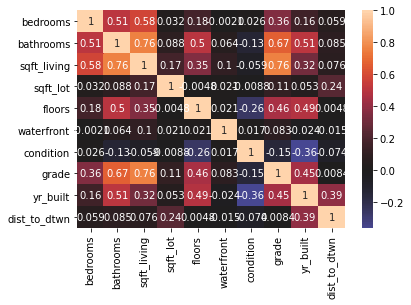

In [88]:
sns.heatmap(corr, center=0, annot=True)

sqft_living and grade = 0.76

sqft_living and bathrooms = 0.76

grade and bathrooms = 0.67

Let's remove grade and bathrooms for this model. We will also use our previous outlier filter, as this seems to be a step in the right direction.

In [116]:
# train3, test3 = train_test_split(df_outlier_filter)

# x_cols = ['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'yr_built', 'dist_to_dtwn']
# predictors = '+'.join(x_cols)
# formula = outcome + '~' + predictors
# model3 = ols(formula=formula, data=train3).fit()
# model3.summary()
X3 = df_outlier_filter.drop(columns=['price','grade','bathrooms'], axis=1)
y3 = df_outlier_filter['price']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2)

# Refit model with subset features
predictors = sm.add_constant(X_train3)
model_3 = sm.OLS(y_train3, predictors).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     4400.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:39:28   Log-Likelihood:                -3815.1
No. Observations:               17277   AIC:                             7648.
Df Residuals:                   17268   BIC:                             7718.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.9203      0.217     50.421      0.000      10.496      11.345
bedrooms        -0.1093      0.010    -10.908      0.000      -0.129      -0.090
sqft_living      0.0004   3.68e-06    103.013      0.000       0.000       0.000
sqft_lot         0.0734      0.003     21.821      0.000       0.067       0.080
floors           0.1233      0.005     22.521      0.000       0.113       0.134
waterfront       0.5183      0.028     18.215      0.000       0.463       0.574
condition        0.0658      0.004     17.057      0.000       0.058       0.073
yr_built         0.0004      0.000      3.812      0.000       0.000       0.001
dist_to_dtwn    -0.0222      0.000    -81.240      0.000      -0.023      -0.022
==============================================================================
Omnibus:                      606.480   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1054.362
Skew:                          -0.299   Prob(JB):                    1.12e-229
Kurtosis:                       4.052   Cond. No.                     2.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

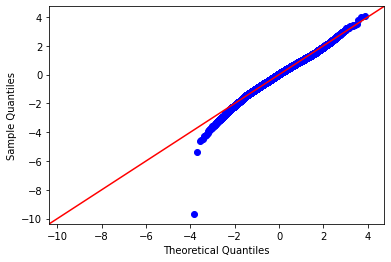

In [117]:
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

In [118]:
regression3 = LinearRegression()
regression3.fit(X_train3, y_train3)

#use the regression for the train and test data
y_hat_train3 = regression3.predict(X_train3)
y_hat_test3 = regression3.predict(X_test3)

#Root Mean Square Error
train_rmse3 = np.sqrt(mean_squared_error(y_train3, y_hat_train3))
test_rmse3 = np.sqrt(mean_squared_error(y_test3, y_hat_test3))

print(f'Train Root Mean Square Error: {train_rmse3}')
print(f'Test Root Mean Square Error: {test_rmse3}')

Train Root Mean Square Error: 0.3017617274860285
Test Root Mean Square Error: 0.3000752203044424


This is a modeling choice. There are pros and cons to this approach versus the first model.  Removing multiple components has substantially diminished the model's performance, as indicated by the r-squared value.  However, multicollinearity between the features has been reduced.

## Model 4

Our QQ plots are less than ideal in previous models. Let's see if we can fix that by using a transform on the appropriate features.

In [92]:
for col_name in df_outlier_filter.columns[1:]:
    print(col_name)
    print(df_outlier_filter[col_name].skew())

bedrooms
2.023641235344595
bathrooms
0.5197092816403838
sqft_living
1.473215455425834
sqft_lot
13.072603567136046
floors
0.6144969756263127
waterfront
12.039584643829357
condition
1.0360374245132955
grade
0.7882366363846076
yr_built
-0.4694499764949978
dist_to_dtwn
0.769367697269784


'sqft_lot' seems to be the main issue with the highest skew coefficient. I'm not sure if I should apply this to waterfront. We may need to use another method here, or look elsewhere for model improvements.

In [93]:
#only run once
df_outlier_filter['sqft_lot'] = np.log(df_outlier_filter['sqft_lot'])
df_outlier_filter['sqft_lot'].skew()

0.9625003856495555

<AxesSubplot:>

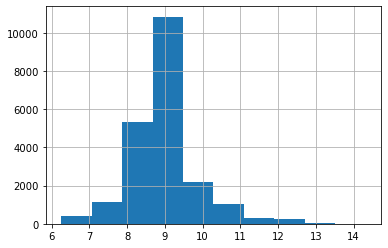

In [94]:
df_outlier_filter['sqft_lot'].hist()

In [95]:
df_outlier_filter['bedrooms'] = np.log(df_outlier_filter['bedrooms'])
df_outlier_filter['bedrooms'].skew()

-0.6805637280656164

In [123]:
# x_cols = list(df_outlier_filter.columns)
# x_cols.remove(outcome)

# train4, test4 = train_test_split(df_outlier_filter)

# predictors = '+'.join(x_cols)
# formula = outcome + '~' + predictors
# model4 = ols(formula=formula, data=train4).fit()
# model4.summary()

X4 = df_outlier_filter.drop(columns=['price'], axis=1)
y4 = df_outlier_filter['price']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2)

# Refit model with subset features
predictors = sm.add_constant(X_train4)
model_4 = sm.OLS(y_train4, predictors).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     4741.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:44:48   Log-Likelihood:                -2030.3
No. Observations:               17277   AIC:                             4083.
Df Residuals:                   17266   BIC:                             4168.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.2076      0.209     67.998      0.000      13.798      14.617
bedrooms        -0.0701      0.009     -7.462      0.000      -0.089      -0.052
bathrooms        0.0635      0.005     13.060      0.000       0.054       0.073
sqft_living      0.0002   4.84e-06     41.162      0.000       0.000       0.000
sqft_lot         0.0621      0.003     19.992      0.000       0.056       0.068
floors           0.0551      0.005     10.726      0.000       0.045       0.065
waterfront       0.5069      0.025     19.906      0.000       0.457       0.557
condition        0.0585      0.003     16.878      0.000       0.052       0.065
grade            0.1815      0.003     59.041      0.000       0.175       0.187
yr_built        -0.0018      0.000    -16.722      0.000      -0.002      -0.002
dist_to_dtwn    -0.0190      0.000    -74.531      0.000      -0.019      -0.018
==============================================================================
Omnibus:                      210.563   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.722
Skew:                          -0.132   Prob(JB):                     1.68e-69
Kurtosis:                       3.609   Cond. No.                     2.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

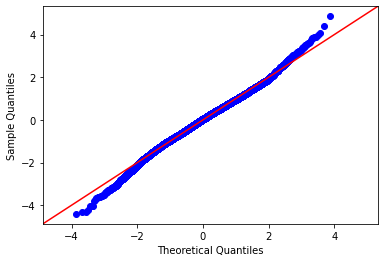

In [125]:
fig = sm.graphics.qqplot(model_4.resid, dist=stats.norm, line='45', fit=True)

In [126]:
regression4 = LinearRegression()
regression4.fit(X_train4, y_train4)

#use the regression for the train and test data
y_hat_train4 = regression4.predict(X_train4)
y_hat_test4 = regression4.predict(X_test4)

#Root Mean Square Error
train_rmse4 = np.sqrt(mean_squared_error(y_train4, y_hat_train4))
test_rmse4 = np.sqrt(mean_squared_error(y_test4, y_hat_test4))

print(f'Train Root Mean Square Error: {train_rmse4}')
print(f'Test Root Mean Square Error: {test_rmse4}')

Train Root Mean Square Error: 0.2721441687452602
Test Root Mean Square Error: 0.27835890131772156


This is a nice improvement. This is our best model thus far. It passes the normality check from looking at the QQ plot and it is homoscedastic.

Interpreting this model:

R-squared: 73.1% variation in the price can be explained by all of our feature columns.

Durbin-waton: A value preferred between 1-2 implies that the regression results are reliable from the side of homoscedasticity.

The highest coefficients belong to Grade and Waterfront: namely, what grade the home has been given by the King County Housing System.  Additionally, having a waterfront view as a part of your home largely impacts the price.

When needed, we can now use this model to give us prediction values for an estimated price, given the values for the features of a home we are trying to sell.  Obviously, someone would be unable to renovate their home to suddenly have a waterfront view, but doing something like adding a bathroom (the 3rd highest coefficient) seems to also have a significant impact of the expected price of a home for this model as well.

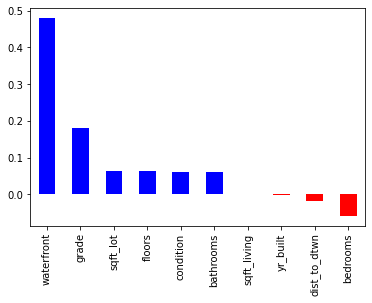

In [99]:
model4.params[1:].sort_values(ascending=False).plot.bar(color=['blue','blue','blue','blue','blue','blue','blue','red','red','red']);

This is a visualization of our coefficients. To compare, I have taken the absolute value of each in the series, but made sure to indicate negative coefficients in red columns. I have also compared the Root Mean Squared Errors of our 4 models below.

In [129]:
print(f'Train Root Mean Square Error 1: {train_rmse}')
print(f'Test Root Mean Square Error 1: {test_rmse}')

print(f'Train Root Mean Square Error 2: {train_rmse2}')
print(f'Test Root Mean Square Error 2: {test_rmse2}')

print(f'Train Root Mean Square Error 3: {train_rmse3}')
print(f'Test Root Mean Square Error 3: {test_rmse3}')

print(f'Train Root Mean Square Error 4: {train_rmse4}')
print(f'Test Root Mean Square Error 4: {test_rmse4}')

Train Root Mean Square Error 1: 0.2740482481449564
Test Root Mean Square Error 1: 1965.0616949122686
Train Root Mean Square Error 2: 0.27343820056668555
Test Root Mean Square Error 2: 0.27311265774878085
Train Root Mean Square Error 3: 0.3017617274860285
Test Root Mean Square Error 3: 0.3000752203044424
Train Root Mean Square Error 4: 0.2721441687452602
Test Root Mean Square Error 4: 0.27835890131772156


Just from glancing at this, I believe the best model to be Model 4.  Although it may be slightly more overfitted than Model 2, Model 4 has the lowest Root Mean Squared Error on its test data. I'll now fit the model on our data, without a train test split.

In [133]:
X_final = df_outlier_filter.drop(columns=['price'], axis=1)
y_final = df_outlier_filter['price']

predictors = sm.add_constant(X_final)
model_final = sm.OLS(y_final, predictors).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     5851.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:53:03   Log-Likelihood:                -2632.6
No. Observations:               21597   AIC:                             5287.
Df Residuals:                   21586   BIC:                             5375.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.1879      0.187     75.701      0.000      13.821      14.555
bedrooms        -0.0610      0.008     -7.312      0.000      -0.077      -0.045
bathrooms        0.0631      0.004     14.468      0.000       0.055       0.072
sqft_living      0.0002   4.31e-06     44.623      0.000       0.000       0.000
sqft_lot         0.0629      0.003     22.683      0.000       0.057       0.068
floors           0.0590      0.005     12.825      0.000       0.050       0.068
waterfront       0.4995      0.023     21.736      0.000       0.454       0.545
condition        0.0595      0.003     19.086      0.000       0.053       0.066
grade            0.1812      0.003     66.004      0.000       0.176       0.187
yr_built        -0.0018   9.55e-05    -18.582      0.000      -0.002      -0.002
dist_to_dtwn    -0.0189      0.000    -82.640      0.000      -0.019      -0.018
==============================================================================
Omnibus:                      358.329   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.147
Skew:                          -0.156   Prob(JB):                    3.88e-127
Kurtosis:                       3.741   Cond. No.                     2.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
regression_final = LinearRegression()
regression_final.fit(X_final, y_final)

y_hat_final = regression_final.predict(X_final)
rmse_final = np.sqrt(mean_squared_error(y_final, y_hat_final))

print(f'Test Root Mean Square Error: {rmse_final}')

Test Root Mean Square Error: 0.2733395685228193


## Conclusion

I believe the best model is Model 4, where the outliers have been filtered out and none of the features are removed . Although this suffers from multicollinearity, it has an r-squared value of ~0.73, which is the most accurate model in our analysis.

I believe this is acceptable within the context of this scenario. It affects the coefficients and p-values, but it does not influence the predicitons, precision of the predictions, and the statistics determining goodness of fit.  Our primary goal is to have a model to make predictions for us.

To further improve this, I would use more of the columns included in the original dataset to try to increase my r-squared value and hopefully fix the QQplot issues I was having for all of my models.